#import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#load data

In [ ]:
df=pd.read_csv("covid_19(Assignment).csv")

In [ ]:
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


#data praparation


##Unerstanding the data
this dataset contains information about covid-19.The columns in the dataset are as follows:


In [ ]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


##Drop Redundancy
 by my experiace all columns here are important,so we will not drop any column.

##Checck dtypes

In [ ]:
dtypes=df.dtypes
n_unic=df.nunique()
pd.DataFrame({"Dtypes":dtypes,"n_unic":n_unic}).T

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
Dtypes,object,object,float64,float64,object,int64,int64,int64,int64,object
n_unic,78,187,260,261,188,10861,3640,7609,8641,6


In [ ]:
df[["Province/State","Country/Region","WHO Region","Date"]]=df[["Province/State","Country/Region","WHO Region","Date"]].astype("category")

In [ ]:
dtypes=df.dtypes
n_unic=df.nunique()
pd.DataFrame({"Dtypes":dtypes,"n_unic":n_unic}).T

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
Dtypes,category,category,float64,float64,category,int64,int64,int64,int64,category
n_unic,78,187,260,261,188,10861,3640,7609,8641,6


##null values

In [ ]:
null_ratio = (df.isnull().sum() / df.shape[0]) * 100
pd.DataFrame({"Null_ratio":null_ratio}).T

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
Null_ratio,70.114943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


column (Province/State) has big null ratio , so we can drop it

In [ ]:
df.drop("Province/State",axis=1,inplace=True)

In [ ]:
null_ratio = (df.isnull().sum() / df.shape[0]) * 100
pd.DataFrame({"Null_ratio":null_ratio}).T

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
Null_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.head()

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


##Check outliers

In [ ]:
df

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...
49063,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


before


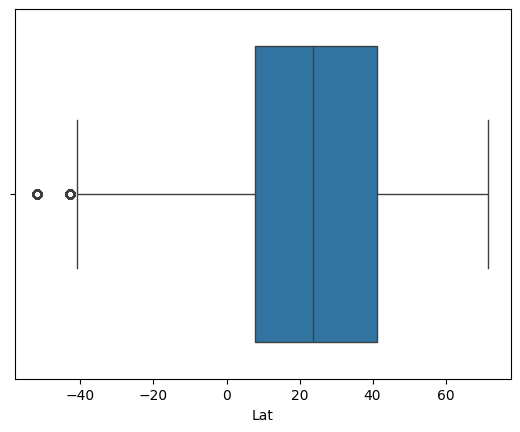

<ipython-input-33-3d406f16c8e4>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace(upper_outliers, upper, inplace = True)
<ipython-input-33-3d406f16c8e4>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

after


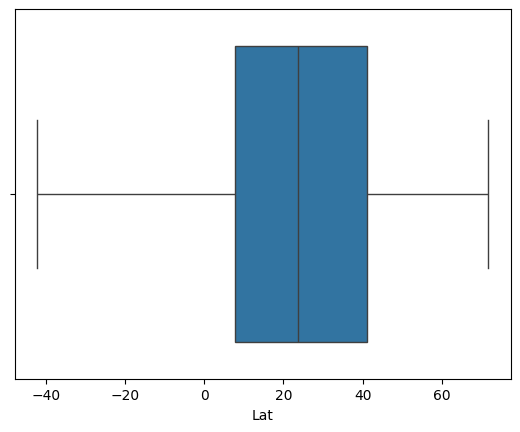

**********************
before


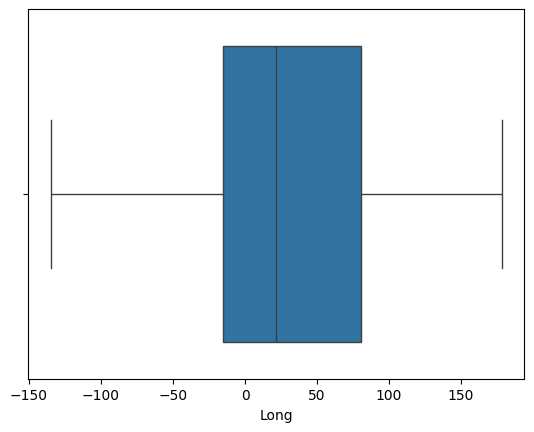

<ipython-input-33-3d406f16c8e4>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace(upper_outliers, upper, inplace = True)
<ipython-input-33-3d406f16c8e4>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

after


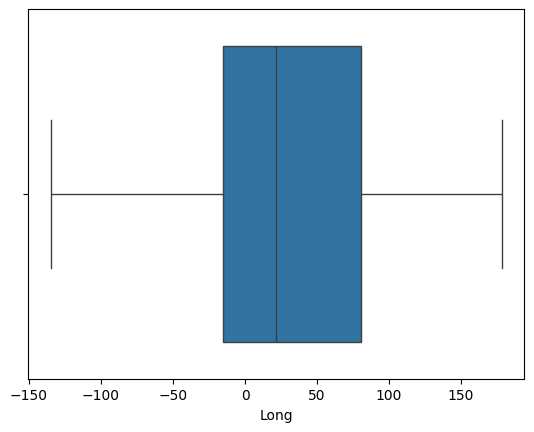

**********************
before


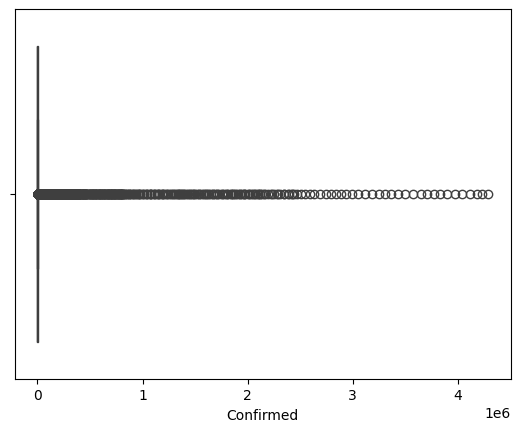

<ipython-input-33-3d406f16c8e4>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace(upper_outliers, upper, inplace = True)


after


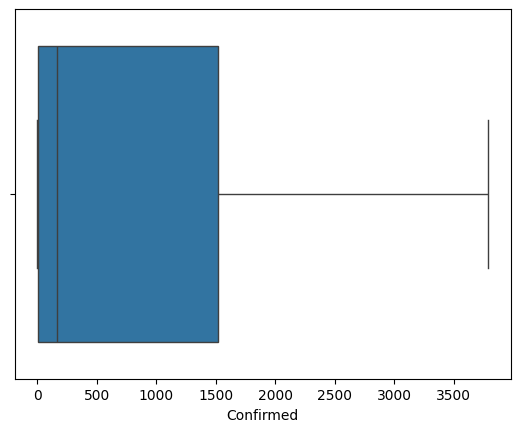

**********************
before


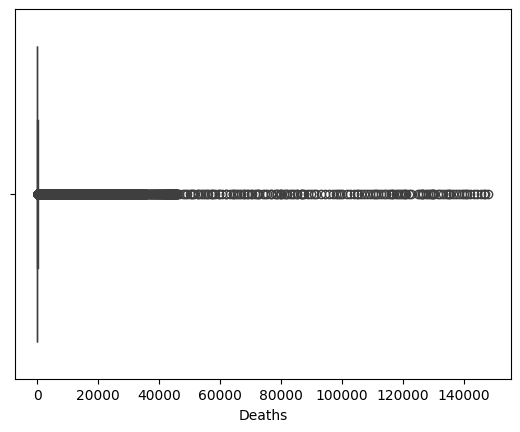

<ipython-input-33-3d406f16c8e4>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace(upper_outliers, upper, inplace = True)
<ipython-input-33-3d406f16c8e4>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

after


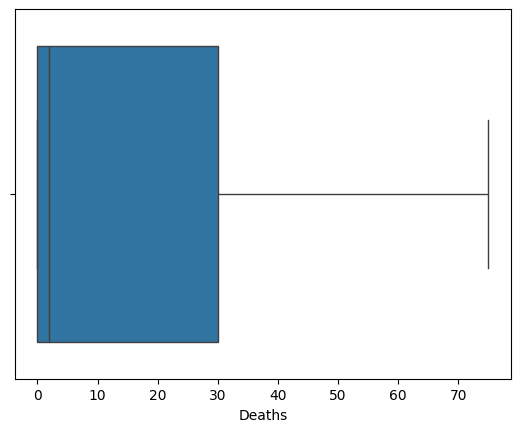

**********************
before


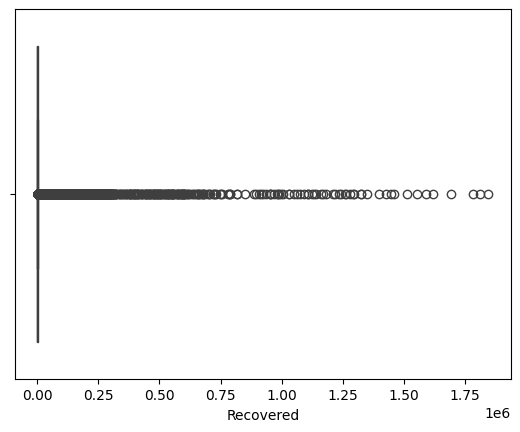

<ipython-input-33-3d406f16c8e4>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace(upper_outliers, upper, inplace = True)
<ipython-input-33-3d406f16c8e4>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

after


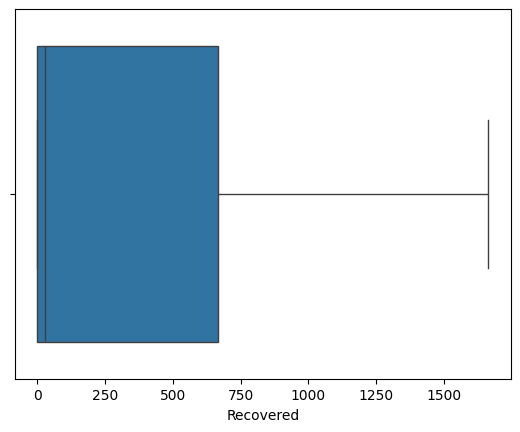

**********************
before


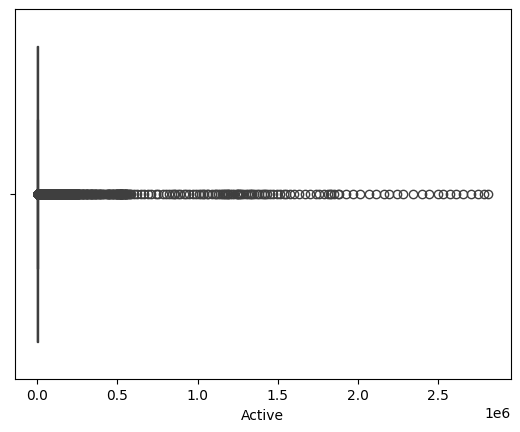

<ipython-input-33-3d406f16c8e4>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace(upper_outliers, upper, inplace = True)
<ipython-input-33-3d406f16c8e4>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

after


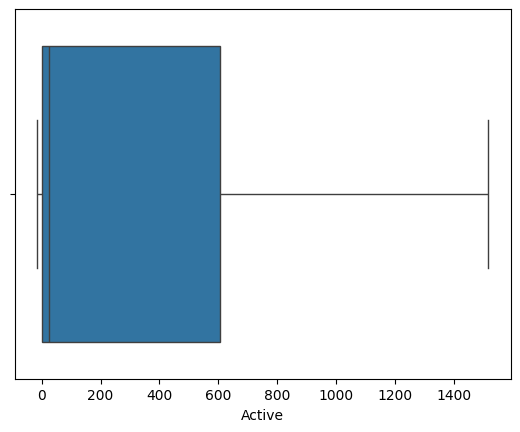

**********************


In [ ]:
for col in df.select_dtypes("number").columns:
  print('before')
  sns.boxplot(df[col],orient='h')
  plt.show()

  q1= df[col].quantile(.25)
  q3= df[col].quantile(.75)
  IQR= q3-q1
  upper= q3+ 1.5*IQR
  lower= q1- 1.5*IQR

  upper_outliers = df[df[col] > upper][col].values
  df[col].replace(upper_outliers, upper, inplace = True)

  lower_outliers = df[df[col] < lower][col].values
  df[col].replace(lower_outliers, lower, inplace = True)

  print('after')
  sns.boxplot(df[col],orient="h")
  plt.show()
  print("**********************")


#visualization

In [ ]:
df

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,33.939110,67.709953,2020-01-22,0.000,0,0,0,Eastern Mediterranean
1,Albania,41.153300,20.168300,2020-01-22,0.000,0,0,0,Europe
2,Algeria,28.033900,1.659600,2020-01-22,0.000,0,0,0,Africa
3,Andorra,42.506300,1.521800,2020-01-22,0.000,0,0,0,Europe
4,Angola,-11.202700,17.873900,2020-01-22,0.000,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...
49063,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865.000,14,734,117,Africa
49064,Yemen,15.552727,48.516388,2020-07-27,1691.000,75,833,375,Eastern Mediterranean
49065,Comoros,-11.645500,43.333300,2020-07-27,354.000,7,328,19,Africa
49066,Tajikistan,38.861000,71.276100,2020-07-27,3789.625,60,1665,1147,Europe


In [ ]:
plt.hist(x)

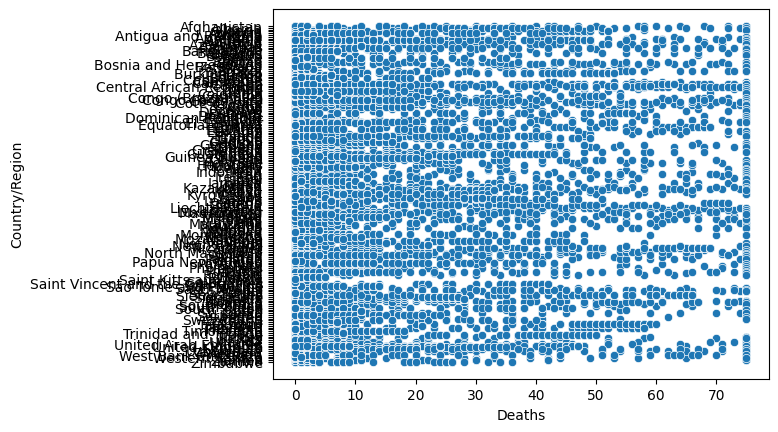

************************************


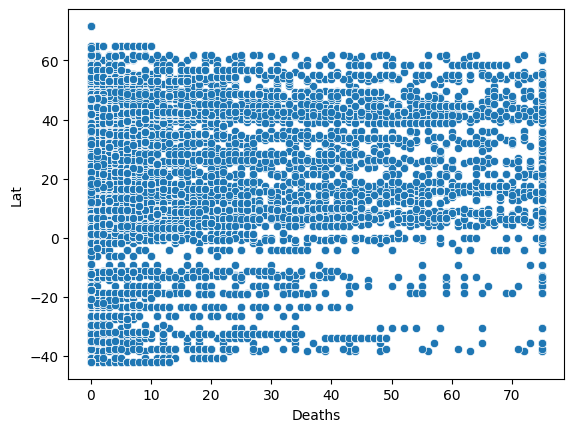

************************************


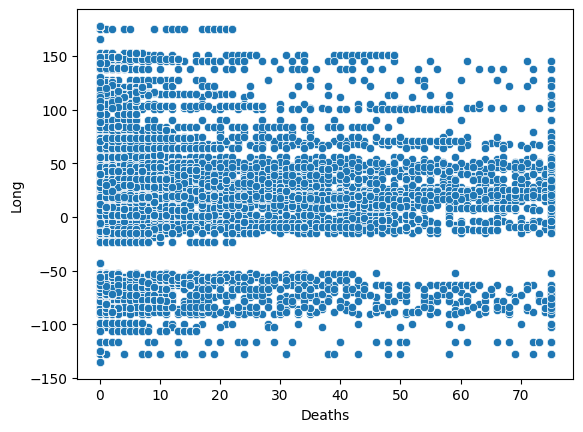

************************************


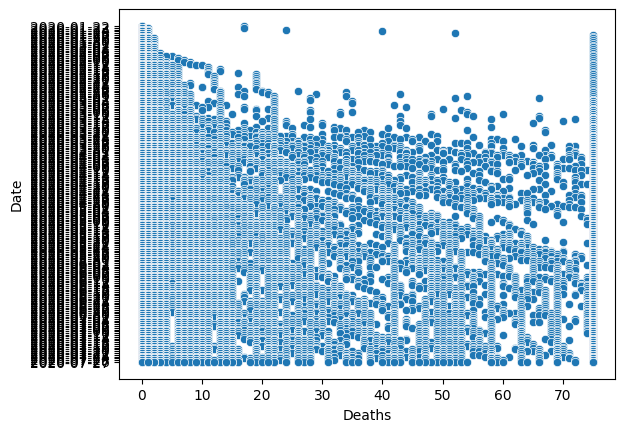

************************************


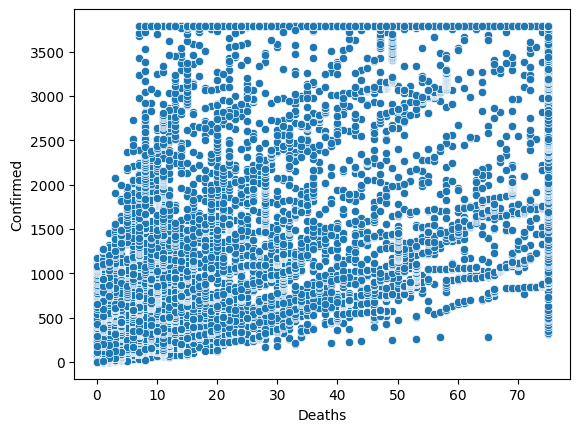

************************************


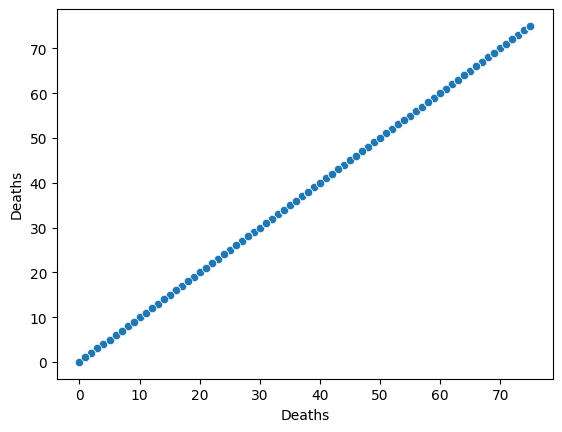

************************************


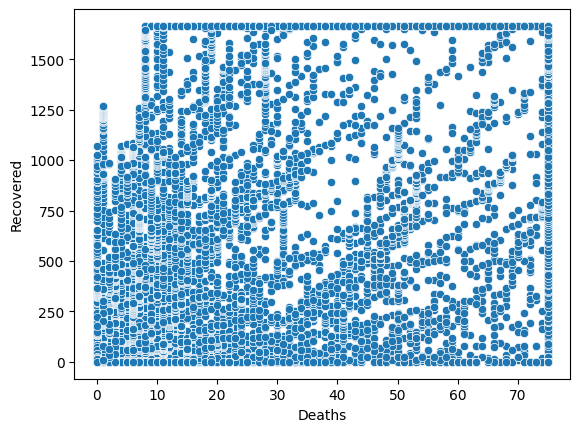

************************************


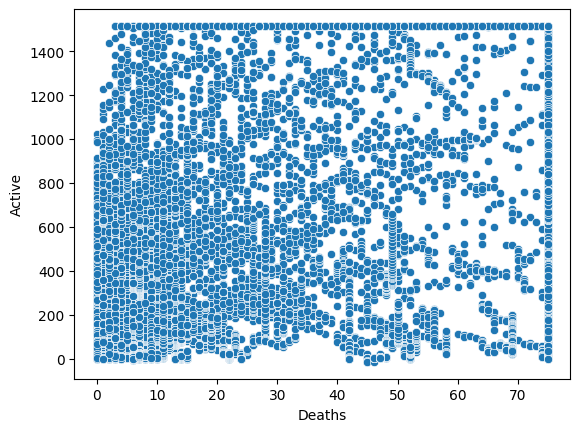

************************************


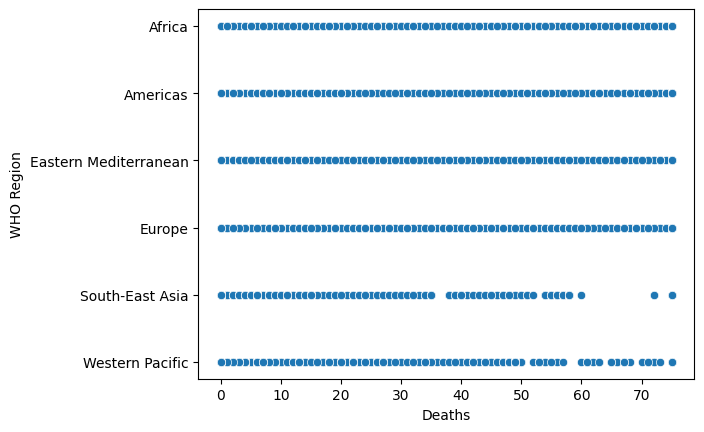

************************************


In [ ]:
for col in df.columns:
  sns.scatterplot(x="Deaths", y=col, data=df)
  plt.show()
  print("************************************")

#Conclusion to the target"Deaths".


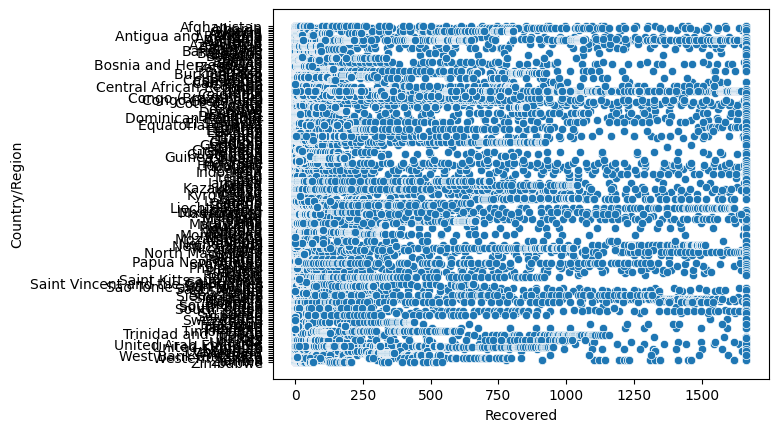

***************************************


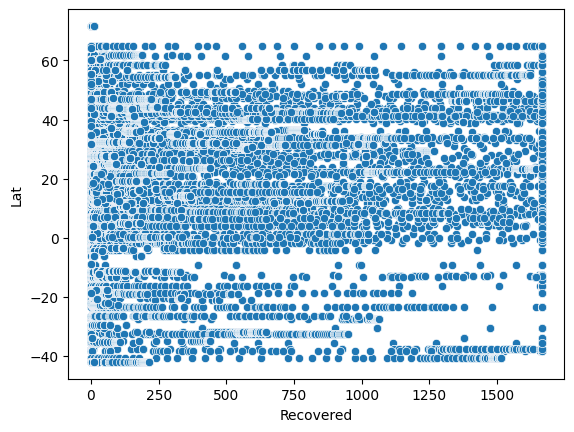

***************************************


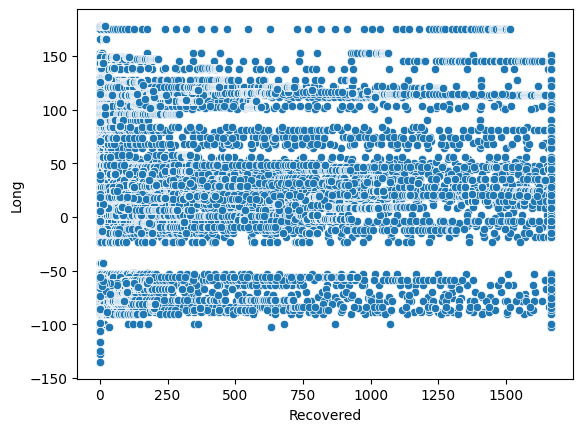

***************************************


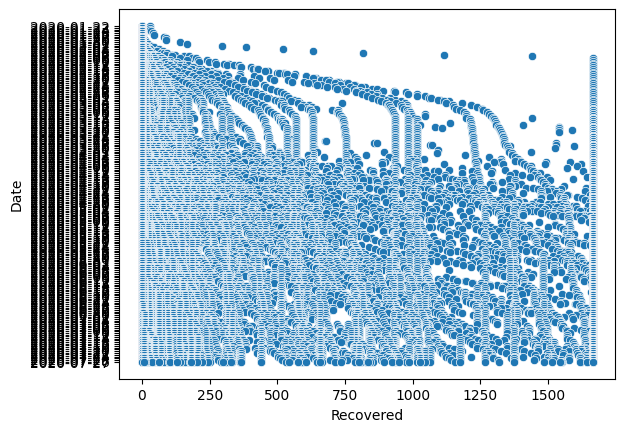

***************************************


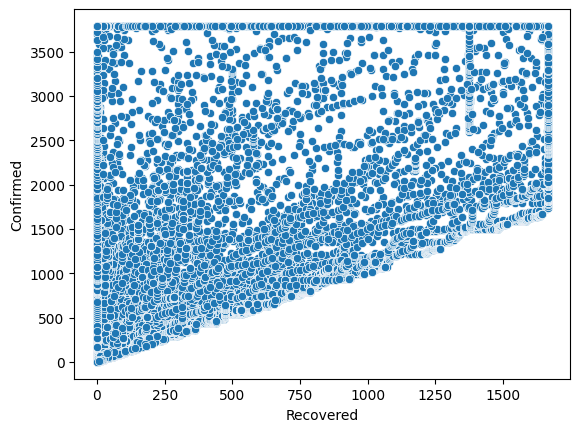

***************************************


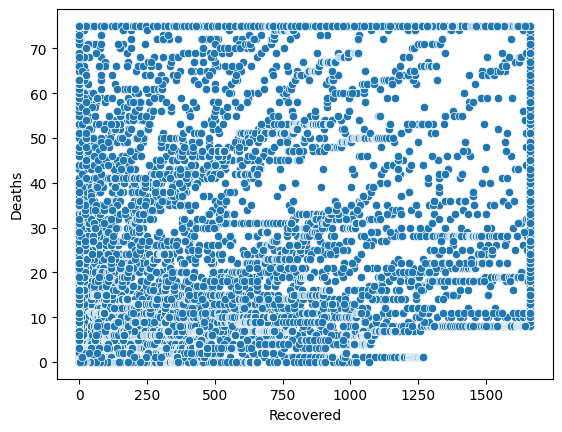

***************************************


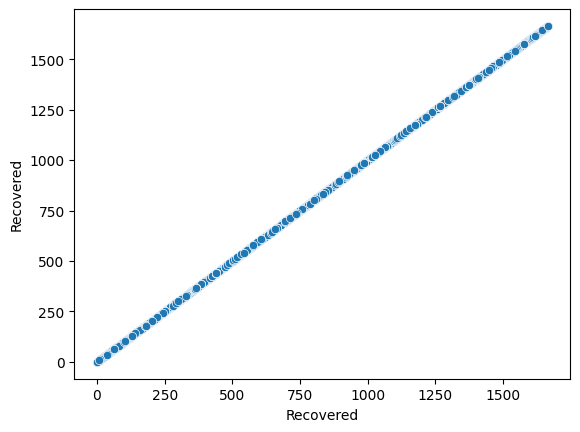

***************************************


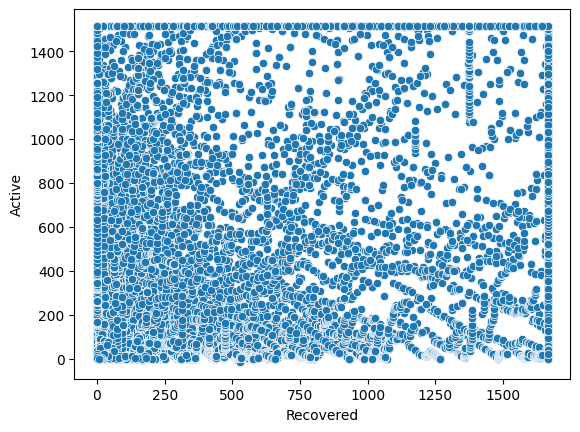

***************************************


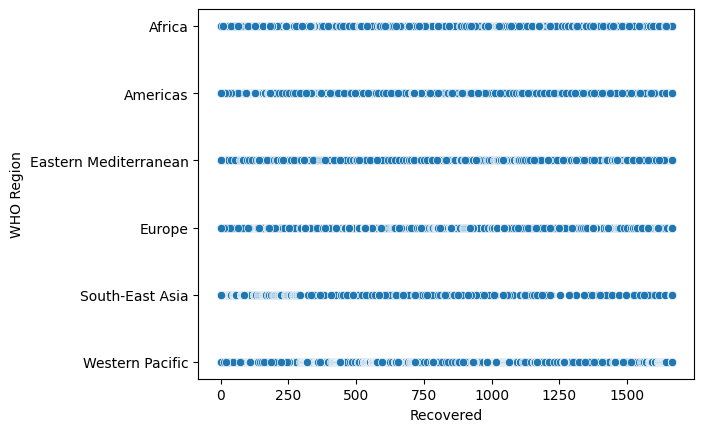

***************************************


In [ ]:
for col in df.columns:
  sns.scatterplot(x="Recovered", y=col, data=df)
  plt.show()
  print("***************************************")

#Conclusion to target"recovered".